# Ant Colony Optimization

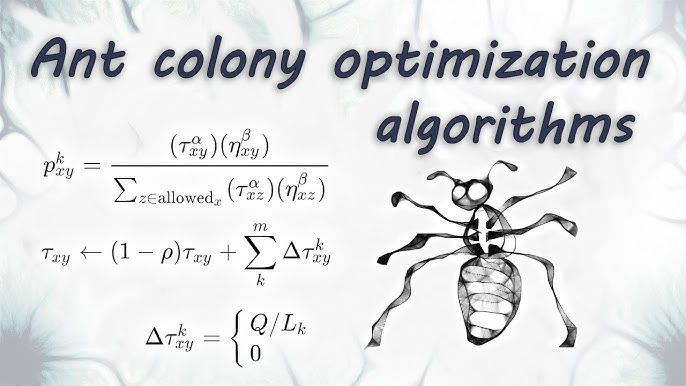

In [4]:
import numpy as np


In [59]:
class ACO:
    def __init__(self, distance_matrix, pheromone_matrix, n_ants, n_iterations, p_vaporization, alpha=1, beta=5, q=1):
        self.distance_matrix = distance_matrix
        self.n_ants = n_ants
        self.n_iterations = n_iterations
        self.p_vaporization = p_vaporization
        self.alpha = alpha
        self.beta = beta
        self.q = q
        self.n_ciudades = distance_matrix.shape[0]
        self.pheromone_matrix = pheromone_matrix

    def select_new_city(self, actual, not_visited):
        pheromone = self.pheromone_matrix[actual][not_visited] ** self.alpha

        quality = (1.0 / self.distance_matrix[actual][not_visited]) ** self.beta

        probabilities = pheromone * quality

        
        probabilities /= sum(probabilities)

        return np.random.choice(not_visited, 1, p=probabilities)[0]

    def make_paths(self,  current_city):
        paths = [ current_city]
        not_visited = list(range(self.n_ciudades))
        not_visited.remove(current_city)


        actual =  current_city
        while not_visited:

            next_city = self.select_new_city(actual, not_visited)

            paths.append(next_city)
            not_visited.remove(next_city)
            actual = next_city


        return paths

    def find_distance_matrix(self, paths):
        distance = 0
        for i in range(len(paths) - 1):
            distance += self.distance_matrix[paths[i]][paths[i+1]]
        distance += self.distance_matrix[paths[-1]][paths[0]]
        return distance

    def update_pheromone_matrix(self, paths, distance_matrixs):
        self.pheromone_matrix *= (1.0 - self.p_vaporization)
        for paths, distance_matrix in zip(paths, distance_matrixs):
            for i in range(len(paths) - 1):
                self.pheromone_matrix[paths[i]][paths[i+1]] += self.q / distance_matrix
            self.pheromone_matrix[paths[-1]][paths[0]] += self.q / distance_matrix

    def solve(self):
        best_path = None
        best_distance = float('inf')
        

        for _ in range(self.n_iterations):
            paths = [self.make_paths(np.random.choice(self.n_ciudades)) for _ in range(self.n_ants)]
            distance_matrixs = [self.find_distance_matrix(paths) for paths in paths]
            self.update_pheromone_matrix(paths, distance_matrixs)
            min_dist = min(distance_matrixs)
            if min_dist < best_distance:
                best_distance = min_dist
                best_path = paths[distance_matrixs.index(min_dist)]

        return best_path, best_distance

In [56]:
def read_file(file_path):
    file = open(file_path, 'r')
    file_data = file.readlines()

    distance_matrix = []
    pheromone_matrix = []

    size = int(input())
    for line in file_data:

        if line == '\n':
            continue

        row = line[:-1]
        row = row.split(' ')
        if len(row) <= 2:
            size = line
            continue

        row = [float(digit) for digit in row[:-1]]
        if len(distance_matrix) < 12:
            distance_matrix.append(row)
        else:
            pheromone_matrix.append(row)


    distance_matrix = np.array(distance_matrix)
    pheromone_matrix = np.array(pheromone_matrix)
        
    return distance_matrix, pheromone_matrix


In [57]:
file_path = './Matrix_data/tai12.dat'
distance_matrix, pheromone_matrix = read_file(file_path)
print(distance_matrix)


1
[[ 0. 21. 95. 82. 56. 41.  6. 25. 10.  4. 63.  6.]
 [21.  0. 44. 40. 75. 79.  1. 89. 35.  9.  1. 85.]
 [95. 44.  0. 84. 12.  1. 26. 91. 11. 35. 82. 26.]
 [82. 40. 84.  0. 69. 56. 86. 45. 91. 59. 18. 76.]
 [56. 75. 12. 69.  0. 39. 18. 57. 36. 61. 36. 21.]
 [41. 79.  1. 56. 39.  0. 71. 11. 29. 82. 82.  6.]
 [ 6.  1. 26. 86. 18. 71.  0. 71.  8. 77. 74. 30.]
 [25. 89. 91. 45. 57. 11. 71.  0. 89. 76. 76. 40.]
 [10. 35. 11. 91. 36. 29.  8. 89.  0. 93. 56.  1.]
 [ 4.  9. 35. 59. 61. 82. 77. 76. 93.  0. 50.  4.]
 [63.  1. 82. 18. 36. 82. 74. 76. 56. 50.  0. 36.]
 [ 6. 85. 26. 76. 21.  6. 30. 40.  1.  4. 36.  0.]]


In [63]:
aco = ACO(distance_matrix,pheromone_matrix, 15, 100, 0.5)
mejor_camino, mejor_distancia = aco.solve()
print("Mejor camino:", mejor_camino)
print("Distancia del mejor camino:", mejor_distancia)

Mejor camino: [8, 11, 9, 1, 10, 3, 7, 5, 2, 4, 6, 0]
Distancia del mejor camino: 136.0
